# Color Palette Generation

## **Import necessary Python libraries and modules**

In [1]:
import pandas as pd 
import csv
import gensim
import numpy as np
import seaborn as sns
import random

from keras.models import Sequential
from keras.layers import Conv1D, Dense, Dropout, GlobalMaxPooling1D
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

2024-03-04 14:35:39.833100: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load Color Palette dataset

The color palette data were scraped from the website "https://colorhunt.co" using python BeautifulSoup package on Jan.27, 2024, and were imported and formatted into a csv file.

$\;\;\;\;\;\;$

In [2]:
cp_final = pd.read_csv("FinalColorPalette.csv")

In [3]:
cp_final.head(8)

,description,color1,color2,color3,color4,likes,url,pastel,vintage,retro,...,sky,sea,kids,skin,food,cream,coffee,wedding,christmas,halloween
0,"pastel, light, summer, nature, gradient, cream",#99BC85,#BFD8AF,#D4E7C5,#E1F0DA,1687,https://colorhunt.co//palette/e1f0dad4e7c5bfd...,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,"pastel, light, spring, skin, cream, wedding",#E6A4B4,#F3D7CA,#FFF8E3,#F5EEE6,3213,https://colorhunt.co//palette/f5eee6fff8e3f3d...,1,0,0,...,0,0,0,1,0,1,0,1,0,0
2,"pastel, vintage, earth, food",#638889,#9DBC98,#EBD9B4,#F9EFDB,2536,https://colorhunt.co//palette/f9efdbebd9b49db...,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,"pastel, vintage, light, summer, spring, happy,...",#FDFFAB,#FFCF81,#FFB996,#D9EDBF,1813,https://colorhunt.co//palette/d9edbfffb996ffc...,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,"pastel, light, nature, gradient, kids, wedding",#F9F7C9,#D5F0C1,#AAD9BB,#80BCBD,2667,https://colorhunt.co//palette/80bcbdaad9bbd5f...,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,"pastel, light, sky",#E5E1DA,#FBF9F1,#AAD7D9,#92C7CF,3349,https://colorhunt.co//palette/92c7cfaad7d9fbf...,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,"pastel, warm, gradient, sunset, sky, kids",#FFE5E5,#E0AED0,#AC87C5,#756AB6,4001,https://colorhunt.co//palette/756ab6ac87c5e0a...,1,0,0,...,1,0,1,0,0,0,0,0,0,0
7,"pastel, light, spring, happy, rainbow, kids",#F6D6D6,#F6F7C4,#A1EEBD,#7BD3EA,2376,https://colorhunt.co//palette/7bd3eaa1eebdf6f...,1,0,0,...,0,0,1,0,0,0,0,0,0,0


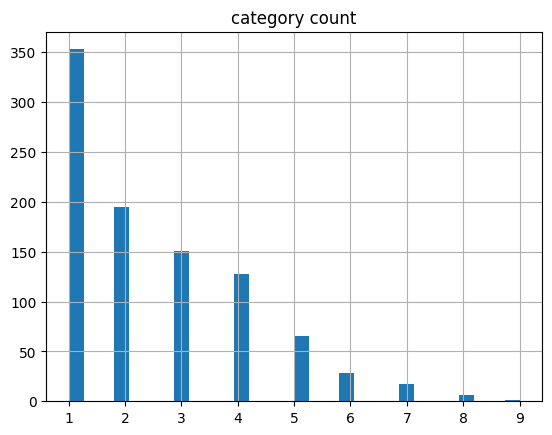

In [4]:
category_count = []

for ele in cp_final['description']:
    ele = str(ele)
    each_count = (len(list(ele.split(","))))
    category_count.append(each_count)
    
length_df = pd.DataFrame({'category count':category_count})
length_df.hist(bins = 30)
plt.show()

$\;\;\;\;\;\;$

This graph shows the relationship between number of color descriptive labels (category) and number of color palettes. 
The x value shows the number of label one color palette can contain (some have only 1 label, some have up to 9 labels), 
The y value shows the total number of color palette based on the count of label attached to it.

Majority of the color palettes contain only 1 category label, and very few of them have 9 labels. 

$\;\;\;\;\;\;$

## Preprocess the data

The data must be preprocessed before training the network. 

We are only working with the first 5 columns of the dataset (description, color1, color2, color3, color4), and these info need to be saved into a large dictionary so that would be easier for the built model to access later.

In [5]:
######################################### read and store color palette into a dictionary to process

c1=[]
c2=[]
c3=[]
c4=[]

description_list= []

with open('/Users/kceeyang/Desktop/FinalModel/FinalColorPalette.csv', 'r', newline='') as inputfile:
    ColorReader = csv.DictReader(inputfile, delimiter=",")
    for col in ColorReader:
        c1.append(col['color1'])
        c2.append(col['color2'])
        c3.append(col['color3'])
        c4.append(col['color4'])

        description_list.append(col['description'])
        
def hex_to_rgb(hexa):
    return tuple(int(hexa[i:i+2], 16)  for i in (0, 2, 4))
        
rgb_key = ["r", "g", "b"]
c1_list_holder = []
c2_list_holder = []
c3_list_holder = []
c4_list_holder = []


for hex in c1: 
    c1_list_holder.append(dict(zip(rgb_key, hex_to_rgb(hex[1:]))))

for hex in c2: 
    c2_list_holder.append(dict(zip(rgb_key, hex_to_rgb(hex[2:]))))

for hex in c3: 
    c3_list_holder.append(dict(zip(rgb_key, hex_to_rgb(hex[2:]))))

for hex in c4: 
    c4_list_holder.append(dict(zip(rgb_key, hex_to_rgb(hex[2:]))))

def multiple_appends(listname, *element):
    listname.extend(element)
    list(listname)

list_dict = []
for x, y, z, t in zip(c1_list_holder, c2_list_holder, c3_list_holder, c4_list_holder):
    multiple_appends(list_dict, x, y, z, t)


colordescript = {}
new_description_list=[]
i=1

for descrip in description_list:
    new_description_list.append(str(i)+" "+descrip.replace(',',''))
    i += 1


for key, rgbvalue in zip(new_description_list, zip(*[iter(list_dict)]*4)):
    colordescript[key] = rgbvalue

###########################################################

All data are saved into the 'colordescript' dictionary.

$\;\;\;\;\;\;$

## Explore the data

The following shows the first 10 color palettes in the 'colordescript' dictionary.

In [6]:
#colordescript
first_five_items = list(colordescript.items())[:5]

#show the first 5 items in colordescript
first_five_items

[('1 pastel light summer nature gradient cream',
  ({'r': 153, 'g': 188, 'b': 133},
   {'r': 191, 'g': 216, 'b': 175},
   {'r': 212, 'g': 231, 'b': 197},
   {'r': 225, 'g': 240, 'b': 218})),
 ('2 pastel light spring skin cream wedding',
  ({'r': 230, 'g': 164, 'b': 180},
   {'r': 243, 'g': 215, 'b': 202},
   {'r': 255, 'g': 248, 'b': 227},
   {'r': 245, 'g': 238, 'b': 230})),
 ('3 pastel vintage earth food',
  ({'r': 99, 'g': 136, 'b': 137},
   {'r': 157, 'g': 188, 'b': 152},
   {'r': 235, 'g': 217, 'b': 180},
   {'r': 249, 'g': 239, 'b': 219})),
 ('4 pastel vintage light summer spring happy nature',
  ({'r': 253, 'g': 255, 'b': 171},
   {'r': 255, 'g': 207, 'b': 129},
   {'r': 255, 'g': 185, 'b': 150},
   {'r': 217, 'g': 237, 'b': 191})),
 ('5 pastel light nature gradient kids wedding',
  ({'r': 249, 'g': 247, 'b': 201},
   {'r': 213, 'g': 240, 'b': 193},
   {'r': 170, 'g': 217, 'b': 187},
   {'r': 128, 'g': 188, 'b': 189}))]

All color hex codes are converted into RGB codes, and all color descriptions of palette are labeled with a number and removed any punctation within the text. 

<br><br>

## **Load pre-trained Word2Vec model**

In [7]:
# Load the binary model

w2v = gensim.models.KeyedVectors.load_word2vec_format("/Users/kceeyang/Downloads/GoogleNews-vectors-negative300.bin", binary = True)

#the above commend is used to get wordVector (w2v)

I downloaded the Google News corpus from "https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300" .


The benefit of using a pre-trained word2vec model is that we don't need to train the model to learn words from scratch and it can be used to represent words as vectors faster. 

In [8]:
print("The model includes ", len(w2v), " running words.")

#input random word
print('Each word is represented in the space of ', len(w2v['night']), ' dimensions.')

print('\n')

The model includes  3000000  running words.
Each word is represented in the space of  300  dimensions.




In [9]:
#note the using uppercase and lowercase would give different vectors (we should be using the lowercase for this model)
print('This gives the first 20 vectors of "night": ', w2v['night'][:20])

print('This gives the first 20 vectors of "Night": ', w2v['Night'][:20])

This gives the first 20 vectors of "night":  [ 0.01574707  0.07666016 -0.03222656  0.0201416   0.01525879 -0.05297852
 -0.01446533 -0.1953125   0.05883789  0.125       0.0480957  -0.10107422
  0.04199219  0.03930664  0.10302734  0.03295898 -0.08300781  0.1328125
  0.24609375  0.11035156]
This gives the first 20 vectors of "Night":  [-0.09375    -0.07421875 -0.26953125  0.21679688 -0.14550781 -0.0703125
  0.14941406 -0.05859375  0.13964844 -0.0213623  -0.16308594  0.19042969
  0.03808594  0.0003624  -0.04443359 -0.06542969  0.00183105 -0.0032959
  0.26953125 -0.18457031]


<br><br>

## **Tokenize text data to generate embedding vector for the CNN model**

Next we need to transform the color palette description and rgb color into a format that the model can be used.

And we will also split the data into a train set (80%) and a test set (20%).

In [10]:
(X_totalset, Y_totalset) = ([], [])

max_tokens = max([len(category.split()[1:]) for category in colordescript])
(total_tokens, dim) = w2v.vectors.shape

empty_vec = np.zeros(dim)


for category in colordescript:
    X = []
    i = 0
    tokens = category.lower().split()[1:]

    for token in tokens:
        X.append(w2v[token])
        i += 1

    while i < max_tokens:
        X.append(empty_vec)
        i += 1

    X_totalset.append(np.array(X))

    
    y = [i[color] for i in colordescript[category] for color in ["r", "g", "b"]]
    Y_totalset.append(np.array(y))


(X_train, Y_train) = ([], [])
(X_test, Y_test) = ([], [])

In [11]:
(X_total, Y_total) = (np.array(X_totalset), np.array(Y_totalset))
print('x_total shape:', X_total.shape)
print('y_total shape:', Y_total.shape)

x_total shape: (944, 9, 300)
y_total shape: (944, 12)


In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_totalset, Y_totalset, random_state=42, train_size = .8)

In [13]:
(X_train, Y_train) = (np.array(X_train), np.array(Y_train))

$\;\;\;\;\;\;$

Show the first 2 palette vectors in the train set

In [14]:
(X_train[:2], Y_train[:2])

(array([[[ 0.00811768, -0.01843262,  0.05834961, ..., -0.18164062,
           0.05541992, -0.15917969],
         [ 0.06835938,  0.31445312, -0.1953125 , ...,  0.11816406,
           0.2578125 , -0.04736328],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],
 
        [[ 0.1796875 ,  0.11767578,  0.06591797, ..., -0.13964844,
          -0.02160645, -0.08691406],
         [ 0.12109375,  0.14550781,  0.14550781, ...,  0.04248047,
           0.16796875,  0.16894531],
         [-0.0189209 ,  0.11865234, -0.0625    , ...,  0.33789062,
           0.18945312,  0.16796875],
         ...,
         [-0.05834961,  0.0383300

$\;\;\;\;\;\;$

Show the first 2 palette vectors in the test set

In [15]:
(X_test, Y_test)=(np.array(X_test), np.array(Y_test))

In [16]:
(X_test[:2], Y_test[:2])

(array([[[ 0.1796875 ,  0.11767578,  0.06591797, ..., -0.13964844,
          -0.02160645, -0.08691406],
         [ 0.13867188,  0.20410156,  0.02893066, ...,  0.08154297,
           0.03955078, -0.08544922],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],
 
        [[ 0.00811768, -0.01843262,  0.05834961, ..., -0.18164062,
           0.05541992, -0.15917969],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.       

In [17]:
print('x_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (755, 9, 300)
Y_train shape: (755, 12)
755 train samples
189 test samples


$\;\;\;\;\;\;$

$\;\;\;\;\;\;$

## Build the CNN model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. 

In [18]:
model = Sequential()
model.add(Conv1D(128, 1, input_shape = (max_tokens, dim), activation = "tanh"))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(12))

The CNN model is instantiated as a Sequentail model.

The Conv1D layer creates a convolution kernel that is convolved with the layer input over a single spatial, with kernel size 1 and filter parameter 128. The input shape is determined by the max number of words appear in the 'colordescript' and the dimension of the word2vec vector. The activation is set to “tanh” (Hyperbolic tangent activation function), which is computationally more efficient and would save calculation cycles.

The GlobalMaxPoolingID layer performs downsampling and operate for 1D temporal data.

The dropout rate is 50%, which helps prevent overfitting.

The dense layer contains 12 neurons, which map to the 12 rgb code needed for a output color palette (4 color x 3 codes for each color).

In [19]:
model.compile(loss = "mse", optimizer = "sgd", metrics= "mse")

The loss function used here is Mean Squared Error since we are dealing with regression.

The optimizer function used is SGD, which would probably decrease generalization error and provide better stability.

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 128)            38528     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 12)                1548      
                                                                 
Total params: 40076 (156.55 KB)
Trainable params: 40076 (156.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


<br><br>

## Train the model

Training the neural network model.

### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

A checkpoint is implemented. It is an intermediate dump of a model’s entire internal state (its weights, current learning rate, etc.) so that the framework can resume the training from this point whenever desired. 

Saving as h5 format is better than tensorflow native format in this case because it only created one generated file.

In [21]:
#checkpoint the model - provide a call back
checkpt = ModelCheckpoint("word2palette_parameters.h5", monitor = "val_loss", verbose = 1, save_best_only = True)

#train the model
modelhistory = model.fit(X_train, Y_train, epochs = 600, validation_split = 0.2, callbacks = [checkpt], validation_data=(X_test, Y_test))

#load the model
model.load_weights("word2palette_parameters.h5")       

Epoch 1/600
16/24 [===================>..........] - ETA: 0s - loss: 14381.9531 - mse: 14381.9531 
Epoch 1: val_loss improved from inf to 5703.05615, saving model to word2palette_parameters.h5
24/24 [==============================] - 1s 17ms/step - loss: 11632.4316 - mse: 11632.4316 - val_loss: 5703.0562 - val_mse: 5703.0562
Epoch 2/600
20/24 [========================>.....] - ETA: 0s - loss: 5704.4810 - mse: 5704.4810

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 5703.05615 to 5401.31738, saving model to word2palette_parameters.h5
24/24 [==============================] - 0s 10ms/step - loss: 5671.1133 - mse: 5671.1133 - val_loss: 5401.3174 - val_mse: 5401.3174
Epoch 3/600
13/24 [===============>..............] - ETA: 0s - loss: 5250.1064 - mse: 5250.1064
Epoch 3: val_loss improved from 5401.31738 to 4956.45557, saving model to word2palette_parameters.h5
24/24 [==============================] - 0s 7ms/step - loss: 5389.2925 - mse: 5389.2925 - val_loss: 4956.4556 - val_mse: 4956.4556
Epoch 4/600
22/24 [==========================>...] - ETA: 0s - loss: 5154.6909 - mse: 5154.6909
Epoch 4: val_loss improved from 4956.45557 to 4746.25977, saving model to word2palette_parameters.h5
24/24 [==============================] - 0s 8ms/step - loss: 5124.9922 - mse: 5124.9922 - val_loss: 4746.2598 - val_mse: 4746.2598
Epoch 5/600
19/24 [======================>.......] - ETA: 0s - loss: 5034.1270 - mse: 5034.1270
Epoch 5: val_l

note: more epoch gives more "sharp" color, less epoch gives more "fuzzy" color

In [22]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score)

Test loss: [3776.802978515625, 3776.802978515625]


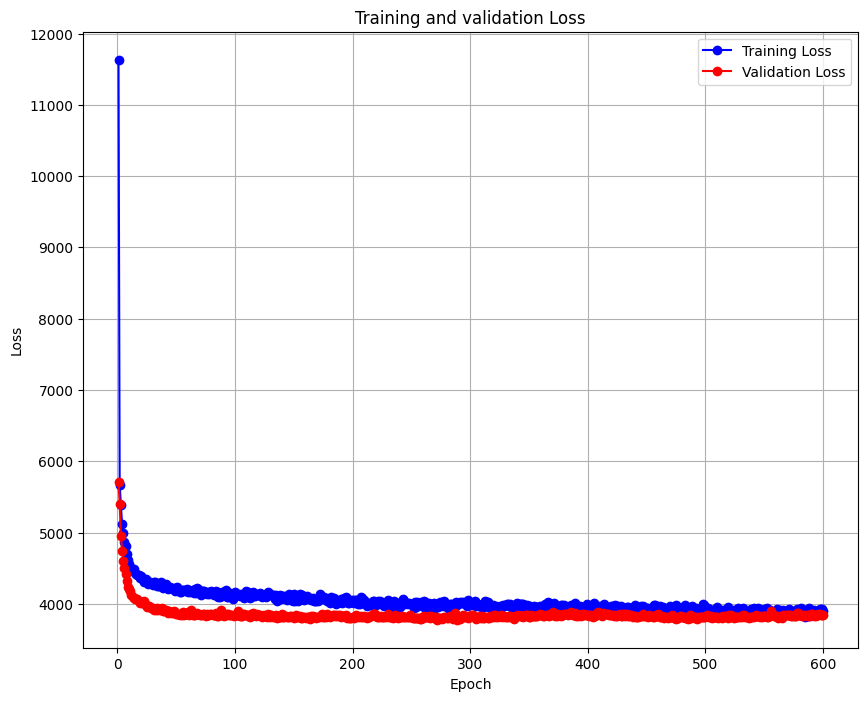

In [23]:
loss = modelhistory.history['loss']
val_loss = modelhistory.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10,8))
plt.grid(True)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Get the MSE score for the train set

In [24]:
y_pred_train = model.predict(X_train)
l_train = len(Y_train)
mse_score_train = sum([np.round(y_pred_train[i])==Y_train[i] for i in range(l_train)])/l_train
print("The MSE trainset score for each RGB color code in the palette:", mse_score_train)
print("\n")

24/24 [==============================] - 0s 3ms/step
The MSE trainset score for each RGB color code in the palette: [0.00529801 0.00927152 0.00529801 0.00927152 0.01059603 0.01324503
 0.00662252 0.00662252 0.00794702 0.00397351 0.00264901 0.00397351]




In [25]:
print ("The MSE trainset score for each color in the palette:",[(sum(mse_score_train[i:i+3]))/3 for i in range(0, len(mse_score_train), 3)])
print("\n")

The MSE trainset score for each color in the palette: [0.006622516556291391, 0.011037527593818985, 0.00706401766004415, 0.003532008830022075]




In [26]:
print ("The MSE trainset score for the palette:",[(sum(mse_score_train))/len(mse_score_train)])
print("\n")

The MSE trainset score for the palette: [0.007064017660044151]




### Get MSE score for the test set

In [27]:
y_pred_test = model.predict(X_test)
l_test = len(Y_test)
mse_score_test = sum([np.round(y_pred_test[i])==Y_test[i] for i in range(l_test)])/l_test

print("The MSE testset score for each RGB color code in the palette:", mse_score_test)
print("\n")

6/6 [==============================] - 0s 3ms/step
The MSE testset score for each RGB color code in the palette: [0.         0.00529101 0.01058201 0.00529101 0.01058201 0.00529101
 0.01058201 0.01058201 0.         0.         0.         0.00529101]




In [28]:
print ("The MSE testset score for each color in the palette:",[(sum(mse_score_test[i:i+3]))/3 for i in range(0, len(mse_score_test), 3)])
print("\n")

The MSE testset score for each color in the palette: [0.005291005291005291, 0.007054673721340388, 0.007054673721340388, 0.001763668430335097]




In [29]:
print ("The MSE testset score for the palette:",[(sum(mse_score_test))/len(mse_score_test)])
print("\n")

The MSE testset score for the palette: [0.005291005291005291]




If MSE = 0, it means a model has no error.

For this model, the 12 outputs all have nearly 0 mse score for both the train and test sets.

Therefore, it shows that the model makes statistically good prediction.

### Plot the performation of the model prediction

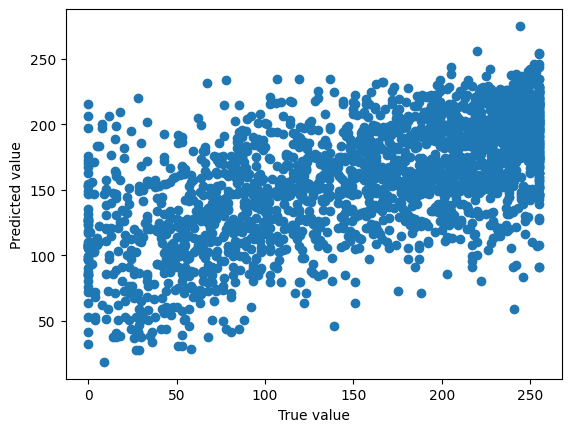

In [30]:
plt.scatter(Y_test, y_pred_test)
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.show(); 

/var/folders/22/7n10_zr11wd_d3q4g5ls8frr0000gn/T/ipykernel_15283/875920704.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals).set_title('Residual Histogram', fontsize = 15)


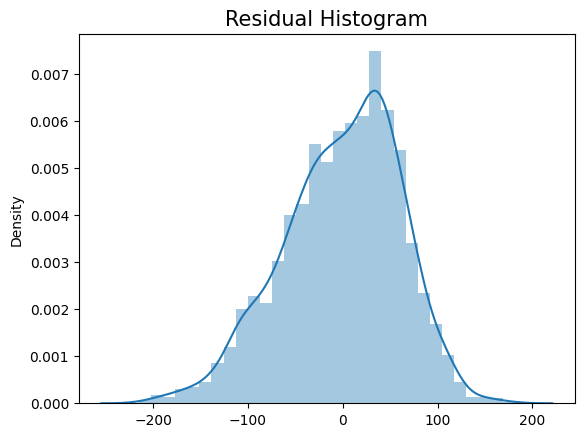

In [31]:
residuals = Y_test - y_pred_test
sns.distplot(residuals).set_title('Residual Histogram', fontsize = 15)
plt.show();

### Define functions to predict (generate) the color palette. 

In [32]:
###################################### Generate color palette from given keywords

def generate_palette(keywords, max_tokens, dim, w2v, model):
 
    input_vec = np.zeros((max_tokens, dim))
    for (i, word) in enumerate(keywords):
        word = word.lower()
        input_vec[i] = w2v[word]                                               #find the vector of the given words in the word2vec model
                                                                               # then insert the vector into the empty input_vec, leave the rest empty 
                                                                               #(eg. input 2 words would give fill the top 2 x 300 with vectors, the rest 7x300 would be filled with zeros)

    
    rgb = model.predict(np.array([input_vec]))[0]                               #use the built model to predict the output with the keywords vector(input_vec)
    return rgb
    
###########################################################     would return 12 rgb code

(max_tokens, dim) = 9 x 300

$\;\;\;\;\;\;$

$\;\;\;\;\;\;$
## Use the trained model

Finally, use the trained model to make a prediction about the color palette based on given keywords.

$\;\;\;\;\;\;$

Palette 1: generated a color palette using words "lonely" and "night."

In [33]:
gen_rgb_1 = generate_palette(["Lonely", "Night"], max_tokens, dim, w2v, model)

1/1 [==============================] - 0s 47ms/step


In [34]:
print(gen_rgb_1)

[202.54312  176.96884  182.97859  147.75476  131.61836  165.11163
  85.63583   85.33591  133.06627   68.733536  71.175766 102.02647 ]


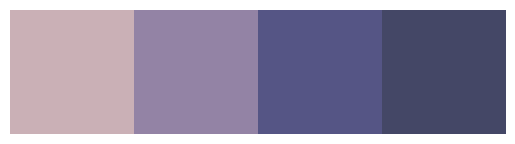

In [35]:
gen_rgb_1 /= 255
palette = np.array_split(gen_rgb_1, 4)    #break into 4 colors
palette = np.array(palette)[np.newaxis, :, :]

plt.imshow(palette)
plt.axis('off')
plt.savefig('gen_palette_1.png') 
plt.show()

$\;\;\;\;\;\;$

Palette 2: generated a color palette using words "golden" and "sunset."

In [36]:
gen_rgb_2 = generate_palette(["golden", "sunset"], max_tokens, dim, w2v, model)

1/1 [==============================] - 0s 33ms/step


In [37]:
print(gen_rgb_2)

[198.95583 148.90552 130.87659 230.51883 146.56847 122.29081 237.18404
 150.38643 136.26718 190.24904 156.11862 153.34782]


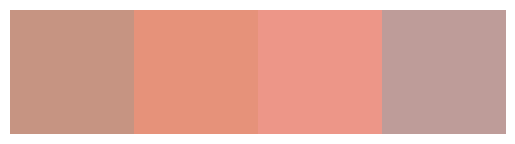

In [38]:
gen_rgb_2 /= 255
palette = np.array_split(gen_rgb_2, 4)    #break into 4 colors
palette = np.array(palette)[np.newaxis, :, :]

plt.imshow(palette)
plt.axis('off')
plt.savefig('gen_palette_2.png') 
plt.show()

$\;\;\;\;\;\;$

Palette 3: generated a color palette using the word "ocean"

In [39]:
gen_rgb_3 = generate_palette(["ocean"], max_tokens, dim, w2v, model)

1/1 [==============================] - 0s 31ms/step


In [40]:
print(gen_rgb_3)

[164.60597  191.4802   186.2657   110.56131  175.38524  185.46675
  82.41074  140.92928  156.3532    93.98388  107.347374 129.55972 ]


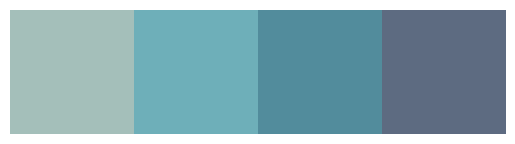

In [41]:
gen_rgb_3 /= 255
palette = np.array_split(gen_rgb_3, 4)    #break into 4 colors
palette = np.array(palette)[np.newaxis, :, :]

plt.imshow(palette)
plt.axis('off')
plt.savefig('gen_palette_3.png') 
plt.show()

$\;\;\;\;\;\;$

I am pleased with the generated palettes. I think they are very pretty.